In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Vocabulary size of the english and foreign words
def vocab_size(english_words,foreign_words):
    english_vocab_size = len(english_words)
    foreign_vocab_size = len(foreign_words)
    print('english_vocab_size: ', english_vocab_size)
    print('foreign_vocab_size: ', foreign_vocab_size)
    return english_vocab_size,foreign_vocab_size

In [3]:
# Extract foreign and english vocabularies
def vocab(sentence_pairs):
    foreign_words = []
    english_words = []

    for sp in sentence_pairs:
        for ew in sp[1]: 
            english_words.append(ew)
        for fw in sp[0]: 
            foreign_words.append(fw)

    english_words = sorted(list(set(english_words)), key=lambda s: s.lower()) 
    foreign_words = sorted(list(set(foreign_words)), key=lambda s: s.lower())
    # print('English vocab: ', english_words)
    # print('Foreign vocab: ', foreign_words)
    return english_words,foreign_words

In [4]:
def init_all(t, init_val, english_words, foreign_words):
    for fw in foreign_words:
        for ew in english_words:
            tup = (ew, fw) # tuple required because dict key cannot be list
            t[tup] = init_val

In [5]:
def init_sentence_pairs(t, init_val, sentence_pairs):
    for a in range(len(sentence_pairs)):
        for d_word in sentence_pairs[a][0]:
            for e_word in sentence_pairs[a][1]:
                t[(e_word, d_word)] = init_val

In [6]:
english_vocab = []
russian_vocab = []
all_pairs = []
new_pairs = []
lines = []
lines_for_pairs = []

counter = 0
for number_of_lines in range(500,3000,500):
    lines.append(number_of_lines)
    print("\n\n",number_of_lines)
    e_data=pd.read_csv("data/pl/pl.txt",sep='\n',header=None, nrows=number_of_lines)
    r_data=pd.read_csv("data/ru/ru.txt",sep='\n',header=None, nrows=number_of_lines)

    df = pd.DataFrame(columns=['russian','polish'])

    for a in range(len(e_data)):
            df.loc[a] = r_data[0][a].split(" "),e_data[0][a].split(" ")

    del e_data
    del r_data

    sentence_pairs = df.to_numpy()
    del df
    
    english_words,foreign_words = vocab(sentence_pairs)
    english_vocab_size,foreign_vocab_size = vocab_size(english_words,foreign_words)
    english_vocab.append(english_vocab_size) 
    russian_vocab.append(foreign_vocab_size)
    
    lines_for_pairs.append(number_of_lines)
    init_val = 1
    t = {}
    init_all(t, init_val, english_words, foreign_words)
    all_pairs.append(len(t))
    print("all_pairs:", all_pairs[counter])

    t = {}
    init_sentence_pairs(t, init_val, sentence_pairs)
    new_pairs.append(len(t))
    print("sentence_pairs:", new_pairs[counter])
    
    counter += 1

    
for number_of_lines in range(3000,7000,1000):
    lines.append(number_of_lines)
    print("\n\n",number_of_lines)
    e_data=pd.read_csv("data/pl/pl.txt",sep='\n',header=None, nrows=number_of_lines)
    r_data=pd.read_csv("data/ru/ru.txt",sep='\n',header=None, nrows=number_of_lines)

    df = pd.DataFrame(columns=['russian','polish'])

    for a in range(len(e_data)):
            df.loc[a] = r_data[0][a].split(" "),e_data[0][a].split(" ")

    del e_data
    del r_data

    sentence_pairs = df.to_numpy()
    del df
    
    english_words,foreign_words = vocab(sentence_pairs)
    english_vocab_size,foreign_vocab_size = vocab_size(english_words,foreign_words)
    english_vocab.append(english_vocab_size) 
    russian_vocab.append(foreign_vocab_size)
    
    counter += 1
    

for number_of_lines in range(7000,15000,2000):
    lines.append(number_of_lines)
    print("\n\n",number_of_lines)
    e_data=pd.read_csv("data/pl/pl.txt",sep='\n',header=None, nrows=number_of_lines)
    r_data=pd.read_csv("data/ru/ru.txt",sep='\n',header=None, nrows=number_of_lines)

    df = pd.DataFrame(columns=['russian','polish'])

    for a in range(len(e_data)):
            df.loc[a] = r_data[0][a].split(" "),e_data[0][a].split(" ")

    del e_data
    del r_data

    sentence_pairs = df.to_numpy()
    del df
    
    english_words,foreign_words = vocab(sentence_pairs)
    english_vocab_size,foreign_vocab_size = vocab_size(english_words,foreign_words)
    english_vocab.append(english_vocab_size) 
    russian_vocab.append(foreign_vocab_size)
    
    counter += 1



 500
english_vocab_size:  3782
foreign_vocab_size:  3817
all_pairs: 14435894
sentence_pairs: 180307


 1000
english_vocab_size:  5942
foreign_vocab_size:  5976
all_pairs: 35509392
sentence_pairs: 315590


 1500
english_vocab_size:  8289
foreign_vocab_size:  8432
all_pairs: 69892848
sentence_pairs: 504591


 2000
english_vocab_size:  10440
foreign_vocab_size:  10728


KeyboardInterrupt: 

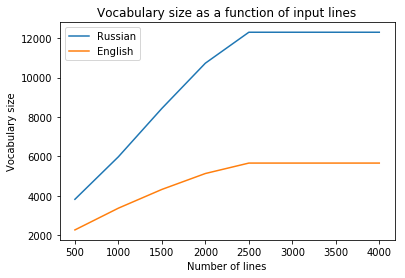

In [12]:
plt.plot(lines,russian_vocab, label="Russian")
plt.plot(lines,english_vocab, label="Polish")
plt.title("Vocabulary size as a function of input lines")
plt.xlabel("Number of lines")
plt.ylabel("Vocabulary size")
plt.legend(loc='upper left')
plt.show()

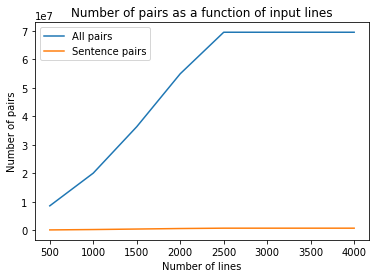

In [13]:
plt.plot(lines_for_pairs,all_pairs, label="All pairs")
plt.plot(lines_for_pairs,new_pairs, label="Sentence pairs")
plt.title("Number of pairs as a function of input lines")
plt.xlabel("Number of lines")
plt.ylabel("Number of pairs")
plt.legend(loc='upper left')
plt.show()

In [14]:
# for number_of_lines in range(75000,110000,25000):
#     lines.append(number_of_lines)
#     print("\n\n",number_of_lines)
#     e_data=pd.read_csv("data/en/en.txt",sep='\n',header=None, nrows=number_of_lines)
#     r_data=pd.read_csv("data/ru/ru.txt",sep='\n',header=None, nrows=number_of_lines)

#     df = pd.DataFrame(columns=['russian','english'])

#     for a in range(len(e_data)):
#             df.loc[a] = r_data[0][a].split(" "),e_data[0][a].split(" ")

#     del e_data
#     del r_data

#     sentence_pairs = df.to_numpy()
#     del df
    
#     english_words,foreign_words = vocab(sentence_pairs)
#     english_vocab_size,foreign_vocab_size = vocab_size(english_words,foreign_words)
#     english_vocab.append(english_vocab_size) 
#     russian_vocab.append(foreign_vocab_size)
    
#     counter += 1



 75000
english_vocab_size:  5656
foreign_vocab_size:  12299


 100000
english_vocab_size:  5656
foreign_vocab_size:  12299


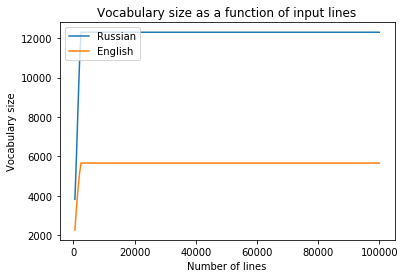

In [16]:
plt.plot(lines,russian_vocab, label="Russian")
plt.plot(lines,english_vocab, label="Polish")
plt.title("Vocabulary size as a function of input lines")
plt.xlabel("Number of lines")
plt.ylabel("Vocabulary size")
plt.legend(loc='upper left')
plt.show()